## Лабораторная работа 1. Морфологический парсер mystem

**Задание 1.** Изучите документацию и лицензию (!) морфологического парсера mystem от Yandex: https://yandex.ru/dev/mystem.

**Задание 2.** Установите `pymystem3` – интерфейс к mystem на Python: https://pypi.org/project/pymystem3.

(!) Обратите внимание, что у конструктора объекта Mystem() есть параметры.

In [ ]:
# Устанавливаем pymystem3
!pip install pymystem3
from pymystem3 import Mystem
import json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
m = Mystem()

**Задание 3.** Выпишите с какими параметрами запускается морфологический анализатор.

При создании объекта Mystem() в pymystem3 можно передать следующие ключевые параметры (флаги, соответствующие флагам бинарного mystem):

-i (disambiguation=True/False): Включение или отключение контекстной омонимии. По умолчанию True (включено). Анализатор выбирает наиболее подходящий разбор слова в данном контексте.

-d (entire_input=False/True): Отключение или включение разрешения омонимии для всего текста целиком. По умолчанию False (работает по предложениям). При установке True анализатор будет использовать для снятия омонимии контекст всего переданного текста, а не отдельного предложения.

-format (format="text" / "json"): Формат вывода. По умолчанию json. Можно задать text для вывода в текстовом виде (редко используется через pymystem3, так как json гораздо удобнее для программной обработки).

-weight (weight=True/False): Выдача информации о весе (частоте) разбора. По умолчанию False.


**ЧР: A=им** означает:

- **ЧР** — Часть Речи
- **A** — прилагательное (от лат. "Adjectivum")
- **=им** — в именительном падеже

## Расшифровка основных обозначений частей речи в mystem:

| Сокращение | Часть речи          | Пример        |
|------------|---------------------|---------------|
| **A**      | Прилагательное      | красивый      |
| **S**      | Существительное     | стол          |
| **V**      | Глагол              | делать        |
| **ADV**    | Наречие             | быстро        |
| **PR**     | Предлог             | в, на, под    |
| **CONJ**   | Союз                | и, но, чтобы  |
| **PART**   | Частица             | бы, же, ли    |
| **SPRO**   | Местоимение-существительное | я, ты, он |
| **APRO**   | Местоименное прилагательное | мой, твой |
| **NUM**    | Числительное        | пять, второй  |
| **INTJ**   | Междометие          | ой, ах        |

## Грамматические характеристики (после запятой):

- **падежи**: им (именительный), рд (родительный), дт (дательный) и т.д.
- **число**: ед (единственное), мн (множественное)
- **род**: мр (мужской), жр (женский), ср (средний)
- **время**: прош (прошедшее), наст (настоящее), буд (будущее)

## Примеры разбора:

- **ЧР: S,жен,неод=им,ед** — существительное, женский род, неодушевленное, именительный падеж, единственное число
- **ЧР: V,несов=прош,ед,изъяв,мр** — глагол, несовершенный вид, прошедшее время, единственное число, изъявительное наклонение, мужской род
- **ЧР: A=им,ед,мр** — прилагательное, именительный падеж, единственное число, мужской род

Так что **A=им** — это прилагательное в именительном падеже.

**а)** Придумайте и запишите примеры предложений со словами не из словаря. Приведите их полученные морфологические разборы.

### 1. Ищем танка, хила и дамагера для пати на данж.

**Слова не из словаря (игровой сленг):**
*   **Танка** (сущ.) — от англ. `tank` (танк, броня). В играх: персонаж, который принимает на себя урон врагов.
    *   **Начальная форма:** танк (в данном контексте используется в разговорной форме с суффиксом -а).
    *   **Признаки:** нариц., одуш., м.р., 1-го склонения. Употреблено в **винительном падеже**, ед. число. В предложении является **дополнением** (ищем (кого?) танка).
*   **Хила** (сущ.) — от англ. `heal` (лечение). В играх: персонаж, который лечит других.
    *   **Начальная форма:** хил (или хилер).
    *   **Признаки:** нариц., одуш., м.р., 1-го склонения. Употреблено в **винительном падеже**, ед. число. В предложении является **дополнением** (ищем (кого?) хила).
*   **Дамагера** (сущ.) — от англ. `damage` (урон). В играх: персонаж, наносящий большой урон.
    *   **Начальная форма:** дамагер.
    *   **Признаки:** нариц., одуш., м.р., 2-го склонения. Употреблено в **винительном падеже**, ед. число (окончание -а вместо -я). В предложении является **дополнением** (ищем (кого?) дамагера).
*   **Пати** (сущ.) — от англ. `party` (вечеринка, группа). В играх: группа игроков.
    *   **Начальная форма:** пати (нескл.).
    *   **Признаки:** нариц., неодуш., ср.р., неизм. слово. Употреблено в **винительном падеже**. В предложении является **дополнением** (для (чего?) пати).
*   **Данж** (сущ.) — от англ. `dungeon` (подземелье). В играх: локация для прохождения командой.
    *   **Начальная форма:** данж.
    *   **Признаки:** нариц., неодуш., м.р., 2-го склонения. Употреблено в **винительном падеже** с предлогом "на". В предложении является **обстоятельством места** (на (что?) данж).

**Общий разбор:** Предложение повествовательное, простое. Грамматическая основа: **Мы (подлежащее, опущено) ищем (сказуемое)**. Остальные слова являются дополнениями и обстоятельством.

---

### 2. Я купил вчера куловые диски и проапререйлил свой мустанг.

**Слова не из словаря (автомобильный тюнинг):**
*   **Куловые** (прил.) — от англ. `cool` (крутой, охлаждающий). Разг. вариант от "охлаждающие".
    *   **Начальная форма:** куловый (в общелит. языке — "охлаждающий").
    *   **Признаки:** относительное прилагательное. Употреблено во **множественном числе**, **винительном падеже**. В предложении является **определением** (диски (какие?) куловые).
*   **Проапререйлил** (глаг.) — от англ. `upgrade` (улучшать, модернизировать). Жаргонная форма, прошедшая через разговорную трансформацию (upgrade -> апгрейдить -> проапрейдить).
    *   **Начальная форма:** проапререйлить (в общелит. языке — "апгрейдить", "модернизировать").
    *   **Признаки:** глагол совершенного вида, переходный, невозвратный, 1-го спряжения. Употреблен в **изъявительном наклонении**, **прошедшем времени**, **мужском роде**, **единственном числе**. В предложении является **однородным сказуемым** (купил и проапререйлил).
*   **Мустанг** (сущ.) — здесь: марка автомобиля Ford Mustang. Хотя слово является именем собственным, в данном контексте оно используется как нарицательное для обозначения конкретной машины говорящего.
    *   **Начальная форма:** Мустанг.
    *   **Признаки:** собственное, неодуш., м.р., 2-го склонения. Употреблено в **винительном падеже**, ед. число. В предложении является **дополнением** (проапререйлил (что?) свой мустанг).

**Общий разбор:** Предложение повествовательное, простое, с однородными сказуемыми. Грамматическая основа: **Я (подлежащее) купил и проапререйлил (однородные сказуемые)**.

---

### 3. Нужно подготовить нормативку на подпись, потом заняться текучкой.

**Слова не из словаря (офисный, корпоративный жаргон):**
*   **Нормативку** (сущ.) — сокращение от "нормативная документация" (документы по стандартам, правилам, ГОСТам).
    *   **Начальная форма:** нормативка.
    *   **Признаки:** нариц., неодуш., ж.р., 1-го склонения. Употреблено в **винительном падеже**, ед. число. В предложении является **дополнением** (подготовить (что?) нормативку).
*   **Текучкой** (сущ.) — от прил. "текущий". Обозначает небольшие, рутинные, ежедневные дела, постоянную работу.
    *   **Начальная форма:** текучка.
    *   **Признаки:** нариц., неодуш., ж.р., 1-го склонения. Употреблено в **творительном падеже** с предлогом "заняться". В предложении является **дополнением** (заняться (чем?) текучкой).

**Общий разбор:** Предложение повествовательное, простое, безличное. Грамматическая основа: **Нужно подготовить и заняться (составное глагольное сказуемое в безличной конструкции)**. Подлежащего нет.

**б)** Применяется ли контекстное снятие омонимии при морфологическом разборе?

Да, применяется, и это одна из ключевых функций mystem.

Контекстное снятие омонимии активно используется по умолчанию (когда параметр disambiguation=True). Алгоритм анализирует окружение слова (соседние слова, их грамматические характеристики, синтаксические связи) чтобы выбрать наиболее вероятную лемму и набор грамматических тегов из всех возможных.

In [ ]:
# Пример анализа текста
text = "Мама мыла раму."
analysis = m.analyze(text)
print(analysis)

[{'analysis': [{'lex': 'мама', 'wt': 1, 'gr': 'S,жен,од=им,ед'}], 'text': 'Мама'}, {'text': ' '}, {'analysis': [{'lex': 'мыть', 'wt': 0.441520999, 'gr': 'V,несов,пе=прош,ед,изъяв,жен'}], 'text': 'мыла'}, {'text': ' '}, {'analysis': [{'lex': 'рама', 'wt': 0.9993591156, 'gr': 'S,жен,неод=вин,ед'}], 'text': 'раму'}, {'text': '.'}, {'text': '\n'}]


**Задание 4.** Напишите функцию `parse_text()`, на вход которой поступает текст (в виде строки), а на выходе формируется структура данных, содержащая для каждого слова входного текста следующую информацию:
- исходную словоформу (wordform);
- нормальную форму слова (лемму) (norm, lemma);
- часть речи (part of speech, POS);
- другую грамматическую информацию, выдаваемую mystem;
- признак, присутствует ли слово в словаре mystem.

Функция должна выбирать наиболее вероятный вариант морфологического разбора слова.

In [ ]:
def parse_text(text):
    """
    Производит морфологический разбор текста с помощью mystem.
    """
    m = Mystem(disambiguation=True)
    analysis_result = m.analyze(text)
    parsed_data = []

    for item in analysis_result:
        # Пропускаем пробелы, знаки препинания и пустые элементы
        if not item.get('analysis') or not item['text'].strip():
            continue

        parsed = item['analysis'][0]
        gram_info = parsed.get('gr', '')
        pos = gram_info.split('=')[0].split(',')[0] if gram_info else 'UNKN'
        lemma = parsed.get('lex', item['text'].lower())

        # Определение наличия в словаре
        qual = parsed.get('qual', '')
        in_dict = qual != 'bastard'  # Если не помечено как 'bastard', то в словаре

        word_info = {
            'wordform': item['text'],
            'lemma': lemma,
            'pos': pos,
            'gram_info': gram_info,
            'in_dict': in_dict
        }

        parsed_data.append(word_info)

    return parsed_data

# Пример использования функции
test_text = "красивая мама красиво мыла раму.раврарап"
result = parse_text(test_text)

print("Результат морфологического разбора:")
print("-" * 80)

for i, word_info in enumerate(result, 1):
    print(f"{i:2d}. Слово: '{word_info['wordform']:15}' "
          f"Лемма: '{word_info['lemma']:15}' "
          f"ЧР: {word_info['pos']:5} "
          f"В словаре: {word_info['in_dict']!s:5} "
          f"Грам.инфо: {word_info['gram_info']}")

Результат морфологического разбора:
--------------------------------------------------------------------------------
 1. Слово: 'красивая       ' Лемма: 'красивый       ' ЧР: A     В словаре: True  Грам.инфо: A=им,ед,полн,жен
 2. Слово: 'мама           ' Лемма: 'мама           ' ЧР: S     В словаре: True  Грам.инфо: S,жен,од=им,ед
 3. Слово: 'красиво        ' Лемма: 'красиво        ' ЧР: ADV   В словаре: True  Грам.инфо: ADV=
 4. Слово: 'мыла           ' Лемма: 'мыть           ' ЧР: V     В словаре: True  Грам.инфо: V,несов,пе=прош,ед,изъяв,жен
 5. Слово: 'раму           ' Лемма: 'рама           ' ЧР: S     В словаре: True  Грам.инфо: S,жен,неод=вин,ед
 6. Слово: 'раврарап       ' Лемма: 'раврарап       ' ЧР: ADV   В словаре: False Грам.инфо: ADV,прдк=


**Задание 5.** Напишите функцию `save_morph_results()`, сохраняющую структуру данных, получаемую функцией `parse_text()`, в текстовый файл формата JSON.

In [ ]:
# Функция для сохранения результатов в JSON
def save_morph_results(data, filename="morph_results.json"):
    """
    Сохраняет результаты разбора в JSON файл
    """
    # Создаем структуру для сохранения
    result_to_save = {
        'total_words': len(data),
        'words': data
    }

    # Сохраняем в файл
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(result_to_save, f, ensure_ascii=False, indent=2)

    print(f" Результаты сохранены в файл: {filename}")
    print(f" Обработано слов: {len(data)}")

# Основная программа
if __name__ == "__main__":

    # Текст для анализа
    text = "Мама мыла раму. Она приготовила ужин."

    print(" Анализируем текст:", text)
    print("-" * 50)

    # Разбираем текст
    parsed_data = parse_text(text)

    # Показываем результаты
    print(" Результаты разбора:")
    for i, word in enumerate(parsed_data, 1):
        dict_status = " В словаре" if word['in_dict'] else "Не в словаре"
        print(f"{i:2d}. {word['wordform']:12} -> {word['lemma']:12} ({word['pos']:4}) {dict_status}")

    # Сохраняем в файл
    save_morph_results(parsed_data)

 Анализируем текст: Мама мыла раму. Она приготовила ужин.
--------------------------------------------------
 Результаты разбора:
 1. Мама         -> мама         (S   )  В словаре
 2. мыла         -> мыть         (V   )  В словаре
 3. раму         -> рама         (S   )  В словаре
 4. Она          -> она          (SPRO)  В словаре
 5. приготовила  -> приготавливать (V   )  В словаре
 6. ужин         -> ужин         (S   )  В словаре
 Результаты сохранены в файл: morph_results.json
 Обработано слов: 6


**Задание 6.** Напишите функцию `get_dictionary()`, на вход которой поступает текст (в виде строки), а на выходе формируется словарь,
включающий все уникальные слова текста и содержащий для каждого слова следующую информацию:
- нормальную форму слова;
- часть речи;
- частоту слова в тексте;
- все варианты словоформ в тексте с данной нормальной формой.

In [ ]:
def get_dictionary(text):
    """
    Создает словарь уникальных слов текста с информацией о них.
    """

    m = Mystem(disambiguation=True)
    analysis_result = m.analyze(text)
    result = {}

    for item in analysis_result:
        # Пропускаем пробелы и пустые элементы
        if not item.get('analysis') or not item['text'].strip():
            continue

        parsed = item['analysis'][0]
        lemma = parsed.get('lex', item['text'].lower()).lower()
        pos = parsed.get('gr', '').split(',')[0].split('=')[0] if parsed.get('gr') else 'UNKN'
        wordform = item['text']

        if lemma not in result:
            result[lemma] = {
                'pos': pos,
                'frequency': 1,
                'wordforms': {wordform}  # Используем множество для уникальности
            }
        else:
            result[lemma]['frequency'] += 1
            result[lemma]['wordforms'].add(wordform)

    # Преобразуем множества обратно в списки
    for lemma in result:
        result[lemma]['wordforms'] = list(result[lemma]['wordforms'])

    return result

# Пример текста для анализа
text = "Красивые кошки любят бегать быстро. Кошки любят играть. Красивая кошка спит."

# Вызов функции
result_dict = get_dictionary(text)

# Вывод результатов
for lemma, data in result_dict.items():
    print(f"Лемма: {lemma}")
    print(f"Часть речи: {data['pos']}")
    print(f"Частота: {data['frequency']}")
    print(f"Словоформы: {data['wordforms']}")
    print("-" * 30)

Лемма: красивый
Часть речи: A
Частота: 2
Словоформы: ['Красивые', 'Красивая']
------------------------------
Лемма: кошка
Часть речи: S
Частота: 3
Словоформы: ['кошка', 'Кошки', 'кошки']
------------------------------
Лемма: любить
Часть речи: V
Частота: 2
Словоформы: ['любят']
------------------------------
Лемма: бегать
Часть речи: V
Частота: 1
Словоформы: ['бегать']
------------------------------
Лемма: быстро
Часть речи: ADV
Частота: 1
Словоформы: ['быстро']
------------------------------
Лемма: играть
Часть речи: V
Частота: 1
Словоформы: ['играть']
------------------------------
Лемма: спать
Часть речи: V
Частота: 1
Словоформы: ['спит']
------------------------------


**Задание 7.** Напишите функцию `save_dictionary()`, сохраняющую предыдущую структуру данных в текстовый файл формата JSON. Слова в файле должны быть упорядочены по убыванию частоты.

In [ ]:
def save_dictionary(dictionary, filename):
    """
    Сохраняет словарь в JSON файл с упорядочиванием по убыванию частоты.

    Args:
        dictionary (dict): Словарь, полученный из get_dictionary()
        filename (str): Имя файла для сохранения
    """
    # Сортируем словарь по убыванию частоты
    sorted_items = sorted(
        dictionary.items(),
        key=lambda x: x[1]['frequency'],
        reverse=True
    )

    # Создаем отсортированный словарь
    sorted_dict = {item[0]: item[1] for item in sorted_items}

    # Сохраняем в файл
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(sorted_dict, f, ensure_ascii=False, indent=2, sort_keys=False)

# Пример текста для анализа
text = "Красивые кошки любят бегать быстро. Кошки любят играть. Красивая кошка спит."

# Создаем словарь
result_dict = get_dictionary(text)

# Сохраняем в файл
save_dictionary(result_dict, "dictionary.json")

# Выводим результаты для проверки
print("Содержимое словаря:")
for lemma, data in result_dict.items():
    print(f"Лемма: {lemma}")
    print(f"Часть речи: {data['pos']}")
    print(f"Частота: {data['frequency']}")
    print(f"Словоформы: {data['wordforms']}")
    print("-" * 30)

print("Словарь сохранен в файл 'dictionary.json'")

Содержимое словаря:
Лемма: красивый
Часть речи: A
Частота: 2
Словоформы: ['Красивые', 'Красивая']
------------------------------
Лемма: кошка
Часть речи: S
Частота: 3
Словоформы: ['кошка', 'Кошки', 'кошки']
------------------------------
Лемма: любить
Часть речи: V
Частота: 2
Словоформы: ['любят']
------------------------------
Лемма: бегать
Часть речи: V
Частота: 1
Словоформы: ['бегать']
------------------------------
Лемма: быстро
Часть речи: ADV
Частота: 1
Словоформы: ['быстро']
------------------------------
Лемма: играть
Часть речи: V
Частота: 1
Словоформы: ['играть']
------------------------------
Лемма: спать
Часть речи: V
Частота: 1
Словоформы: ['спит']
------------------------------
Словарь сохранен в файл 'dictionary.json'


**Задание 8.** Напишите функцию `get_non_mystem_dict()`, на вход которой поступает структура данных, получаемая функцией `parse_text()`, а на выходе формируется словарь, содержащий уникальные слова текста, отсутствующие в словаре mystem, вместе с частотой слова в тексте. **Остановились на этом**

In [ ]:
def get_non_mystem_dict(parsed_data):
    """
    Создает словарь слов, отсутствующих в словаре mystem, с их частотой.

    Args:
        parsed_data (list): Структура данных от parse_text()

    Returns:
        dict: Словарь, где ключ - словоформа, значение - частота в тексте
    """
    non_dict_words = {}

    for word_info in parsed_data:
        if not word_info['in_dict']:
            wordform = word_info['wordform']
            if wordform in non_dict_words:
                non_dict_words[wordform] += 1
            else:
                non_dict_words[wordform] = 1

    return non_dict_words

# Тестирование функции
test_text = "красивая мама красиво мыла раму. Дамагера засумонили в данж"

# Разбираем текст
parsed_result = parse_text(test_text)

# Получаем словарь слов не из mystem
non_mystem_words = get_non_mystem_dict(parsed_result)

print("Слова, отсутствующие в словаре mystem:")
print("-" * 50)

for word, frequency in non_mystem_words.items():
    print(f"'{word}': {frequency}")

print(f"\nВсего уникальных слов не из словаря: {len(non_mystem_words)}")
print(f"Общее количество таких слов в тексте: {sum(non_mystem_words.values())}")

Слова, отсутствующие в словаре mystem:
--------------------------------------------------
'Дамагера': 1
'засумонили': 1
'данж': 1

Всего уникальных слов не из словаря: 3
Общее количество таких слов в тексте: 3


**Задание 9.** Напишите функцию `save_non_mystem_dict()`, сохраняющую структуру данных, получаемую функцией `get_non_mystem_dict()`, в текстовый файл формата TSV (tab-separated values). Слова в файле должны быть упорядочены по убыванию частоты.

In [ ]:
def save_non_mystem_dict(non_dict_words, filename):
    """
    Сохраняет словарь слов, отсутствующих в mystem, в TSV файл.
    Слова упорядочены по убыванию частоты.

    Args:
        non_dict_words (dict): Словарь от get_non_mystem_dict()
        filename (str): Имя файла для сохранения
    """
    # Сортируем словарь по убыванию частоты
    sorted_words = sorted(
        non_dict_words.items(),
        key=lambda x: x[1],
        reverse=True
    )

    # Сохраняем в TSV файл
    with open(filename, 'w', encoding='utf-8') as f:
        # Записываем заголовок
        f.write("Слово\tЧастота\n")

        # Записываем данные
        for word, frequency in sorted_words:
            f.write(f"{word}\t{frequency}\n")

# Сохраняем в файл
filename = "non_mystem_words.tsv"
save_non_mystem_dict(non_mystem_words, filename)

print(f"\nФайл '{filename}' успешно сохранен!")


Файл 'non_mystem_words.tsv' успешно сохранен!


**Задание 10.** Напишите функцию `get_pos_distribution()`, на вход которой поступает словарь, формируемый функцией `get_dictionary()`, а на выходе выдается структура данных, содержащая частотное распределение частей речи в словаре со следующими значениями


|часть речи|количество уникальных слов|общее количество слов|
| -------- | ------------------------ | ------------------- |

In [ ]:
def get_pos_distribution(dictionary):
    """
    Создает частотное распределение частей речи в словаре.

    Args:
        dictionary (dict): Словарь от get_dictionary()

    Returns:
        dict: Словарь, где ключ - часть речи, значение - словарь с:
            - 'unique_words' (int): количество уникальных слов
            - 'total_words' (int): общее количество слов
    """
    pos_distribution = {}

    for lemma, info in dictionary.items():
        pos = info['pos']
        frequency = info['frequency']

        if pos not in pos_distribution:
            pos_distribution[pos] = {
                'unique_words': 1,
                'total_words': frequency
            }
        else:
            pos_distribution[pos]['unique_words'] += 1
            pos_distribution[pos]['total_words'] += frequency

    return pos_distribution

result_pos = get_pos_distribution(result_dict)

# Вывод результатов
print("Частотное распределение частей речи:")
print("-" * 60)
print(f"{'Часть речи':<15} {'Уникальные слова':<20} {'Всего слов':<15}")
print("-" * 60)

for pos, stats in result_pos.items():
    print(f"{pos:<15} {stats['unique_words']:<20} {stats['total_words']:<15}")


Частотное распределение частей речи:
------------------------------------------------------------
Часть речи      Уникальные слова     Всего слов     
------------------------------------------------------------
A               1                    2              
S               1                    3              
V               4                    5              
ADV             1                    1              


**Задание 11.** Проведите эксперименты с разработанными функциями:
- скачайте 10 файлов с текстами разных жанров и разного размера (например, произведения классиков, современных писателей, новостные статьи, научные статьи и т.п.). *Учитывайте кодировку* – все файлы должны быть в UTF-8; Например из библиотеки Максима Мошкова lib.ru
- обработайте файлы при помощи функций `parse_text()`, `get_dictionary()` и `get_non_mystem_dict()`, и сохраните результаты в текстовых файлах при помощи функций `save_morph_results()`, `save_dictionary()` и `save_non_mystem_dict()`. Измеряйте время запуска функций! (см. следующий пункт);
- заполните следующую таблицу:

|Файл|Размер, байт|Размер текста (кол-во слов)|Размер словаря (кол-во уникальных слов)|Время работы get_dictionary(), сек.|
|----|------------|---------------------------|---------------------------------------|-----------------------------------|
- для самого большого словаря постройте частотное распределение слов:
  - по оси ординат – частота,
  - по оси абсцисс – слова, упорядоченные по убыванию частоты (по-другому, ранги слов);
- постройте график зависимость времени морфологического анализа от размера текстового файла;
- распределение частей речи, полученное функцией `get_pos_distribution()`, выведите на экран в виде таблицы и графика.


Найдено файлов: 10

Обрабатываем файл: Fatiha.txt
--------------------------------------------------
 Результаты сохранены в файл: Fatiha_morph.json
 Обработано слов: 2433
Размер файла: 32112 байт
Количество слов: 2433
Уникальных слов: 687
Время get_dictionary(): 0.9355 сек

Обрабатываем файл: account_62.txt
--------------------------------------------------
 Результаты сохранены в файл: account_62_morph.json
 Обработано слов: 839
Размер файла: 12492 байт
Количество слов: 839
Уникальных слов: 315
Время get_dictionary(): 1.1746 сек

Обрабатываем файл: accounts_receivable.txt
--------------------------------------------------
 Результаты сохранены в файл: accounts_receivable_morph.json
 Обработано слов: 814
Размер файла: 12551 байт
Количество слов: 814
Уникальных слов: 328
Время get_dictionary(): 1.1865 сек

Обрабатываем файл: air_ground.txt
--------------------------------------------------
 Результаты сохранены в файл: air_ground_morph.json
 Обработано слов: 552
Размер файла: 7872 байт

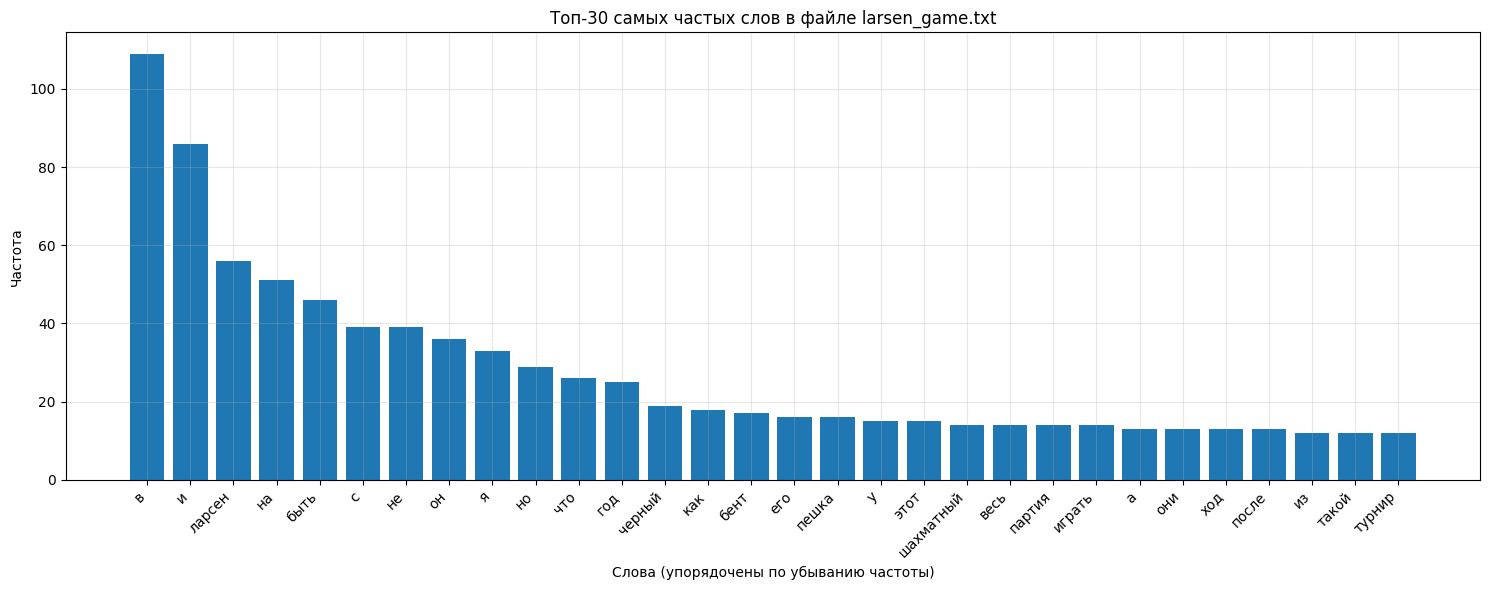

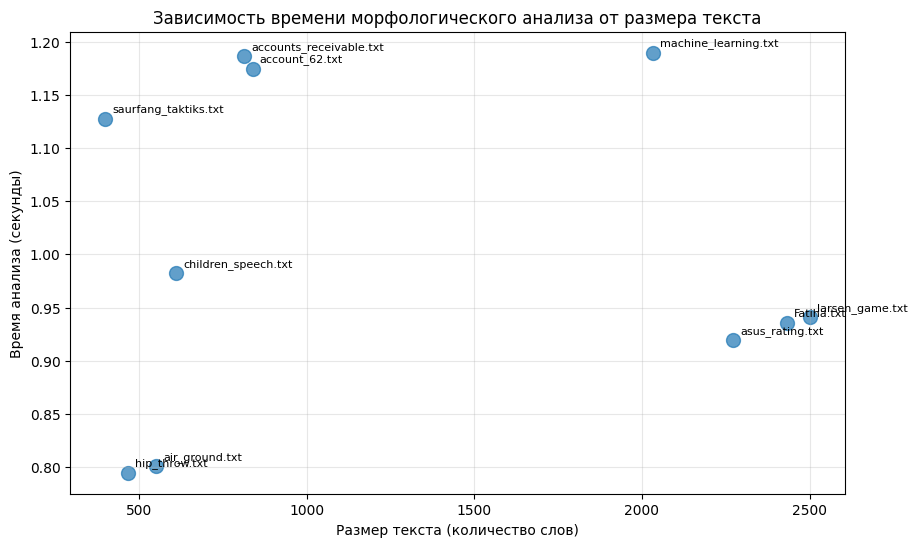


РАСПРЕДЕЛЕНИЕ ЧАСТЕЙ РЕЧИ В ФАЙЛЕ larsen_game.txt
Часть речи  Уникальные слова  Всего слов
       S          441            835    
       V          228            393    
       A          146            252    
     ADV           80            125    
    APRO           24            118    
      PR           23            306    
    CONJ           17            189    
    PART           16             76    
    SPRO           15            134    
  ADVPRO           14             45    
     NUM            4             11    
    ANUM            3             16    
    INTJ            1              1    


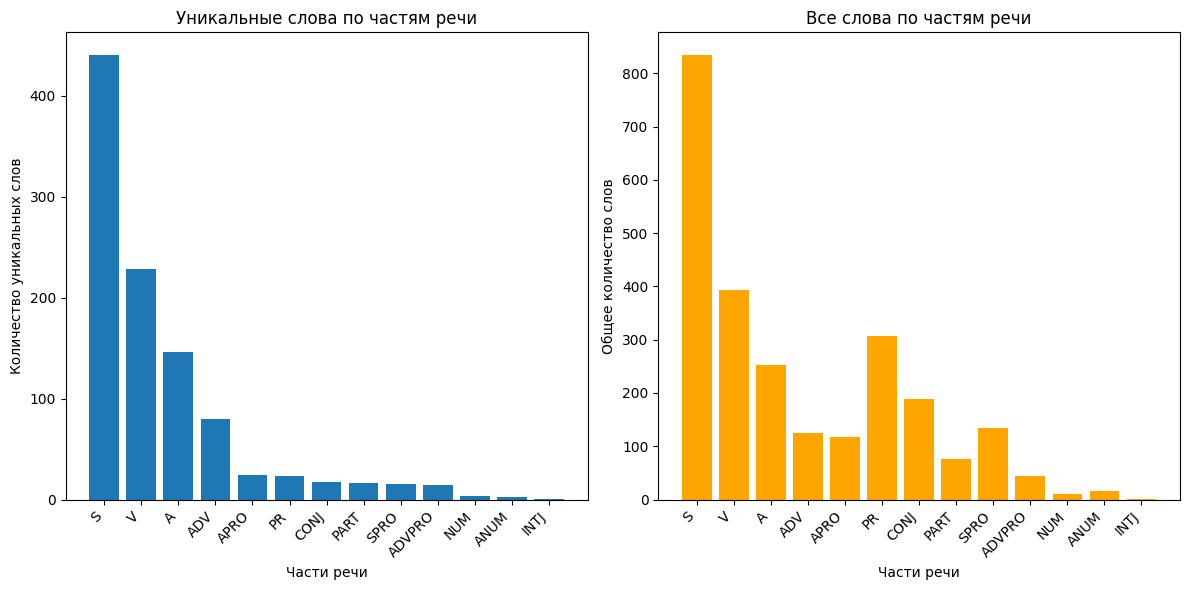


Результаты сохранены в файл: analysis_results.csv


In [ ]:
import os
import time
import json
import matplotlib.pyplot as plt
import pandas as pd

# Путь к папке с текстами
texts_path = "/content/drive/MyDrive/NLP/labs/nlp_lab1/texts"

# Получаем список файлов
files = os.listdir(texts_path)
files = [f for f in files if f.endswith('.txt')]
files.sort()

print(f"Найдено файлов: {len(files)}")

# Создаем таблицу для результатов
results_table = []

# Обрабатываем каждый файл
for file_name in files:
    file_path = os.path.join(texts_path, file_name)

    print(f"\nОбрабатываем файл: {file_name}")
    print("-" * 50)

    # Читаем файл
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()

    # Получаем размер файла в байтах
    file_size = os.path.getsize(file_path)

    # Замеряем время для parse_text
    start_time = time.time()
    parsed_data = parse_text(text)
    parse_time = time.time() - start_time

    # Замеряем время для get_dictionary
    start_time = time.time()
    dictionary = get_dictionary(text)
    dict_time = time.time() - start_time

    # Получаем словарь слов не в mystem
    non_dict_words = get_non_mystem_dict(parsed_data)

    # Сохраняем результаты
    base_name = os.path.splitext(file_name)[0]

    save_morph_results(parsed_data, f"{base_name}_morph.json")
    save_dictionary(dictionary, f"{base_name}_dict.json")
    save_non_mystem_dict(non_dict_words, f"{base_name}_non_dict.tsv")

    # Добавляем данные в таблицу
    results_table.append({
        'Файл': file_name,
        'Размер, байт': file_size,
        'Размер текста (кол-во слов)': len(parsed_data),
        'Размер словаря (кол-во уникальных слов)': len(dictionary),
        'Время работы get_dictionary(), сек.': round(dict_time, 4)
    })

    print(f"Размер файла: {file_size} байт")
    print(f"Количество слов: {len(parsed_data)}")
    print(f"Уникальных слов: {len(dictionary)}")
    print(f"Время get_dictionary(): {dict_time:.4f} сек")

# Выводим таблицу результатов
print("\n" + "="*80)
print("РЕЗУЛЬТАТЫ АНАЛИЗА ФАЙЛОВ")
print("="*80)

df_results = pd.DataFrame(results_table)
print(df_results.to_string(index=False))

# Находим файл с самым большим словарем
max_dict_file = max(results_table, key=lambda x: x['Размер словаря (кол-во уникальных слов)'])
max_file_name = max_dict_file['Файл']
base_name = os.path.splitext(max_file_name)[0]

print(f"\nСамый большой словарь в файле: {max_file_name}")

# Загружаем словарь самого большого файла
with open(f"{base_name}_dict.json", 'r', encoding='utf-8') as f:
    max_dict = json.load(f)

# Создаем частотное распределение для графика
word_freq_pairs = []
for lemma, info in max_dict.items():
    word_freq_pairs.append((lemma, info['frequency']))

# Сортируем по убыванию частоты
word_freq_pairs.sort(key=lambda x: x[1], reverse=True)

# Разделяем на слова и частоты
words = [pair[0] for pair in word_freq_pairs]
frequencies = [pair[1] for pair in word_freq_pairs]

# Берем топ-30 самых частых слов для лучшей читаемости графика
top_words = words[:30]
top_frequencies = frequencies[:30]

# Строим график частотного распределения
plt.figure(figsize=(15, 6))
plt.bar(range(len(top_words)), top_frequencies)
plt.xlabel('Слова (упорядочены по убыванию частоты)')
plt.ylabel('Частота')
plt.title(f'Топ-30 самых частых слов в файле {max_file_name}')
plt.xticks(range(len(top_words)), top_words, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# Строим график зависимости времени анализа от размера текста
plt.figure(figsize=(10, 6))
sizes = [x['Размер текста (кол-во слов)'] for x in results_table]
times = [x['Время работы get_dictionary(), сек.'] for x in results_table]
file_names = [x['Файл'] for x in results_table]

plt.scatter(sizes, times, s=100, alpha=0.7)
plt.xlabel('Размер текста (количество слов)')
plt.ylabel('Время анализа (секунды)')
plt.title('Зависимость времени морфологического анализа от размера текста')

# Добавляем подписи точек
for i, (size, time_val, name) in enumerate(zip(sizes, times, file_names)):
    plt.annotate(name, (size, time_val), xytext=(5, 5),
                textcoords='offset points', fontsize=8)

plt.grid(True, alpha=0.3)
plt.show()

# Анализ распределения частей речи для самого большого словаря
pos_distribution = get_pos_distribution(max_dict)

print("\n" + "="*80)
print(f"РАСПРЕДЕЛЕНИЕ ЧАСТЕЙ РЕЧИ В ФАЙЛЕ {max_file_name}")
print("="*80)

# Создаем таблицу для POS распределения
pos_table = []
for pos, stats in pos_distribution.items():
    pos_table.append({
        'Часть речи': pos,
        'Уникальные слова': stats['unique_words'],
        'Всего слов': stats['total_words']
    })

# Сортируем по убыванию количества уникальных слов
pos_table.sort(key=lambda x: x['Уникальные слова'], reverse=True)

df_pos = pd.DataFrame(pos_table)
print(df_pos.to_string(index=False))

# Строим график распределения частей речи
plt.figure(figsize=(12, 6))

# График для уникальных слов
plt.subplot(1, 2, 1)
unique_words = [x['Уникальные слова'] for x in pos_table]
pos_labels = [x['Часть речи'] for x in pos_table]
plt.bar(range(len(unique_words)), unique_words)
plt.xlabel('Части речи')
plt.ylabel('Количество уникальных слов')
plt.title('Уникальные слова по частям речи')
plt.xticks(range(len(pos_labels)), pos_labels, rotation=45, ha='right')

# График для общего количества слов
plt.subplot(1, 2, 2)
total_words = [x['Всего слов'] for x in pos_table]
plt.bar(range(len(total_words)), total_words, color='orange')
plt.xlabel('Части речи')
plt.ylabel('Общее количество слов')
plt.title('Все слова по частям речи')
plt.xticks(range(len(pos_labels)), pos_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Сохраняем итоговую таблицу в файл
df_results.to_csv('analysis_results.csv', index=False, encoding='utf-8')
print("\nРезультаты сохранены в файл: analysis_results.csv")